# Regression Analysis of Diamond Price Prediction

## Data Description:

- *carat*: The weight of the diamond, measured in carats. Carat weight is often considered a significant factor in determining a diamond's value, as larger diamonds are generally more valuable.

- *cut*: Refers to the quality of the diamond's cut, which affects its brilliance and sparkle. Common cut grades include Excellent, Very Good, Good, Fair, and Poor.

- *color*: Indicates the diamond's color grade, ranging from D (colorless) to Z (light yellow or brown). Diamonds with higher color grades (closer to D) are generally more valuable.

- *clarity*: Describes the presence of internal and external flaws, known as inclusions and blemishes, respectively. Clarity grades range from Flawless (no inclusions or blemishes visible under 10x magnification) to Included (inclusions visible to the naked eye).

- *depth*: Represents the height of the diamond measured from the culet (bottom) to the table (top), divided by the average girdle diameter. It is expressed as a percentage.

- *table*: Refers to the width of the diamond's table (the flat top facet) as a percentage of the average girdle diameter. It is also expressed as a percentage.

- *price*: The target variable, which represents the price of the diamond in the dataset. This is the value we aim to predict using the other features.

- *x, y, z*: These represent the diamond's length, width, and depth measurements, respectively, expressed in millimeters.



In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [23]:
#read the dataset
df=pd.read_csv('DiamondsPrices - DiamondsPrices.csv')

In [24]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
#no NaN values
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [26]:
#check for null
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
df.shape

(53940, 10)

In [28]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [30]:
df.info()
#checking for datatypes of each feature 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Univariate Analysis:

In [31]:
#summary statistics
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


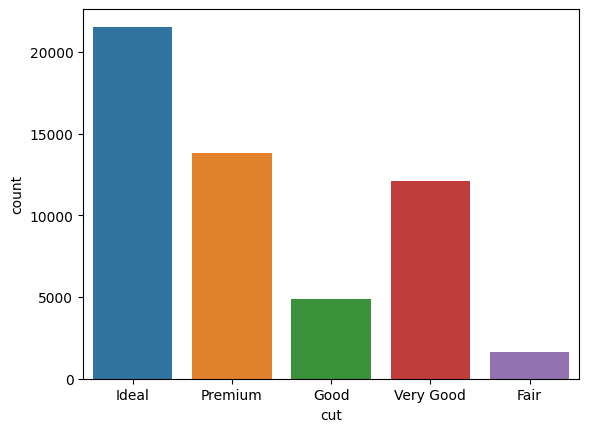

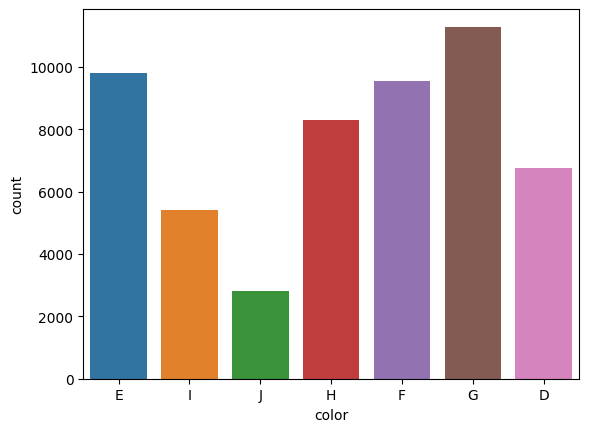

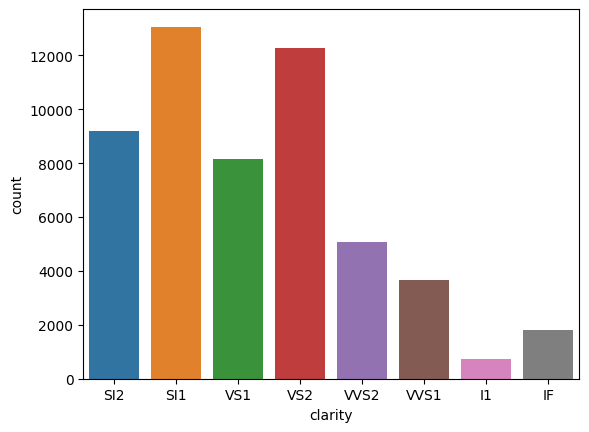

In [32]:
#plotting categorical variables
df_cat = df.select_dtypes(include='object')

for col in df_cat:
    sns.countplot(data=df_cat,x=col)
    plt.show()

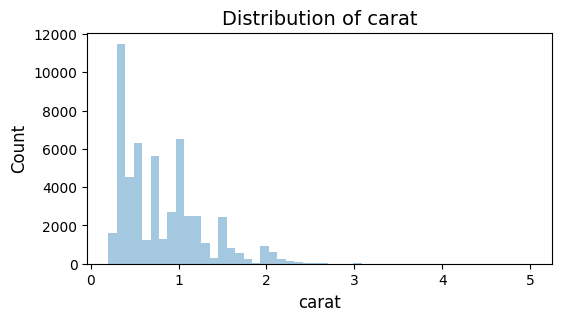

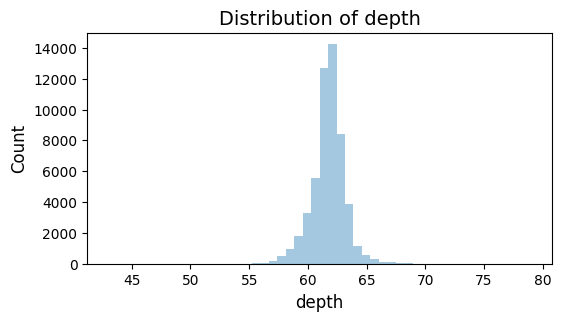

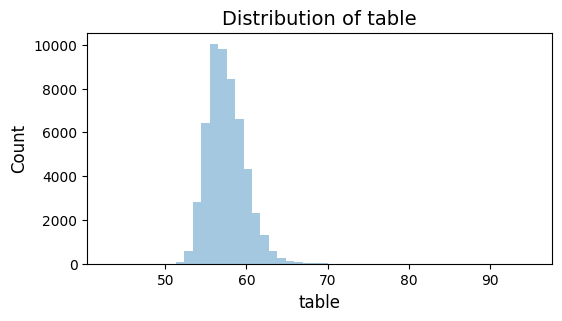

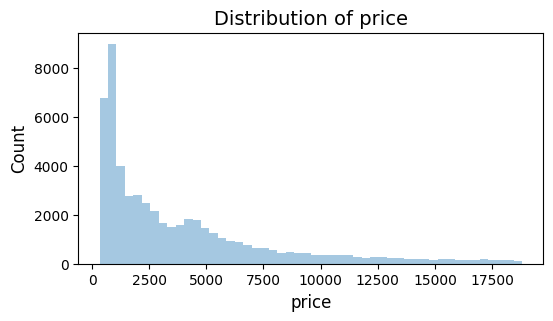

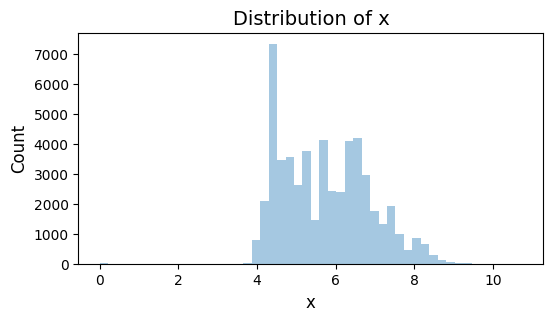

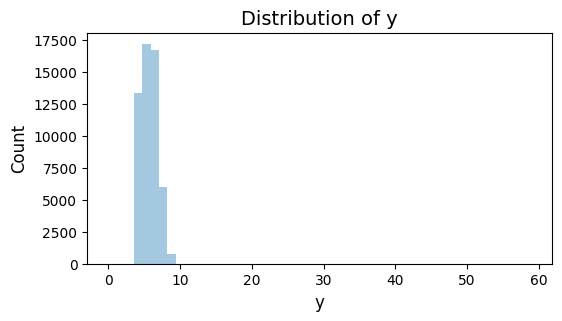

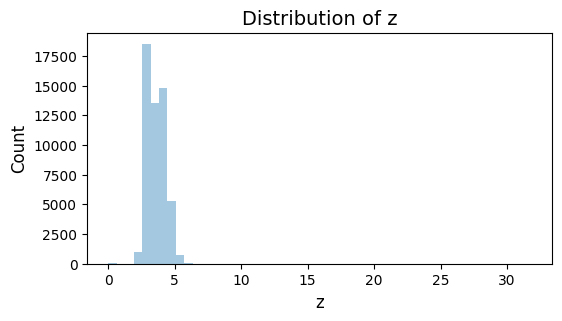

In [35]:
# Select the numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Plot the distribution of each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6,3))  # Adjust the figure size if needed
    sns.distplot(df[column], kde=False)  # Plot the histogram without the kernel density estimate
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


**Univarite Inferences:**

- Most of the diamonds are in the ideal cut category and the least cut are the fair ones
- Diamonds of clarity -IL is the least in the dataset
- Color D,E,F,G,H are fairly higher means that majority of the diamond quality in this dataset is good
- There are no poor-cut diamonds in the data
- The quality of diamonds in this dataset fall on the good side.
- Price is highly skewed

# Bivariate Analysis:

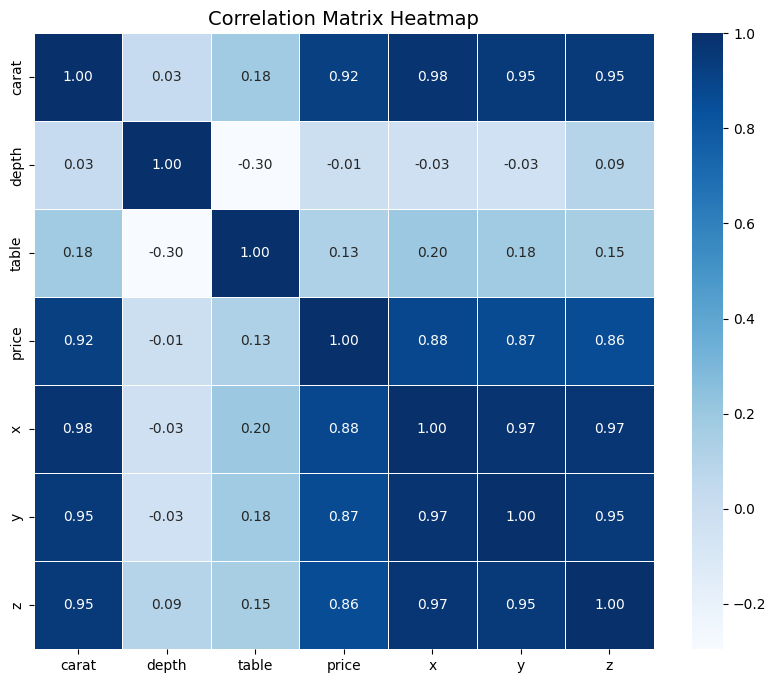

In [43]:
#correalation
correlation_matrix = df.select_dtypes('number').corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

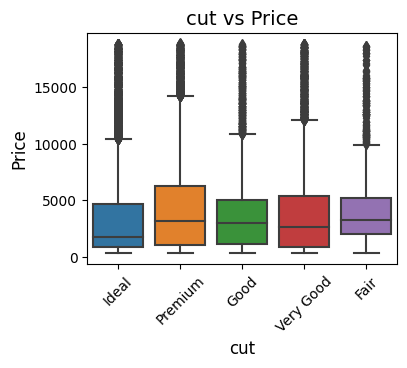

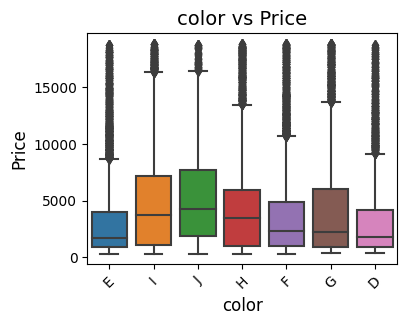

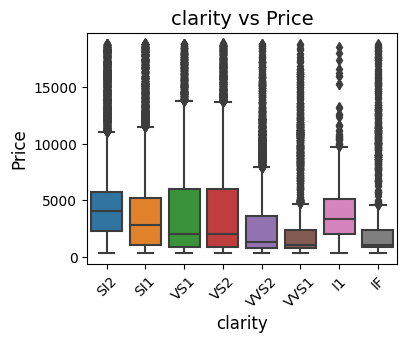

In [45]:
categorical_columns = df.select_dtypes(include='object').columns

# Plot the categorical columns against the price label
for column in categorical_columns:
    plt.figure(figsize=(4,3))  # Adjust the figure size if needed
    sns.boxplot(x=column, y='price', data=df)
    plt.title(f'{column} vs Price', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()


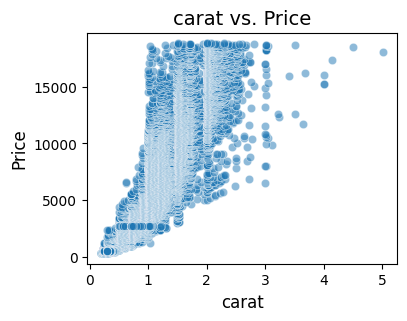

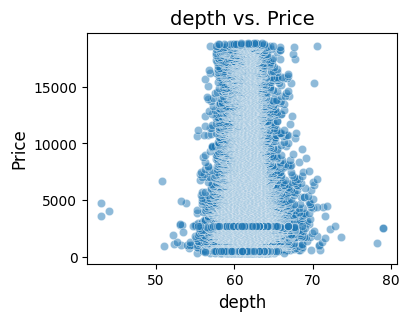

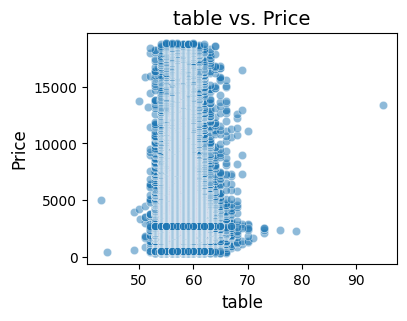

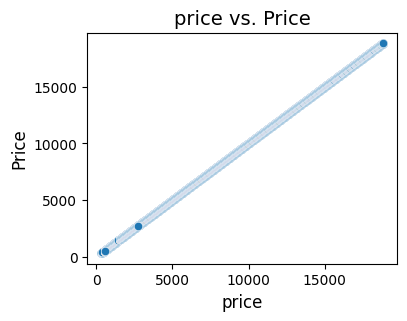

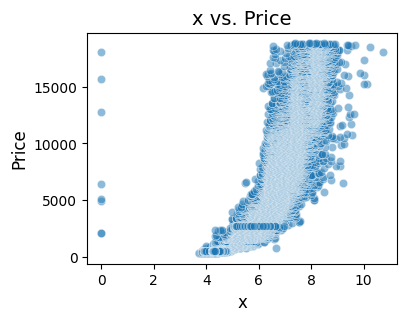

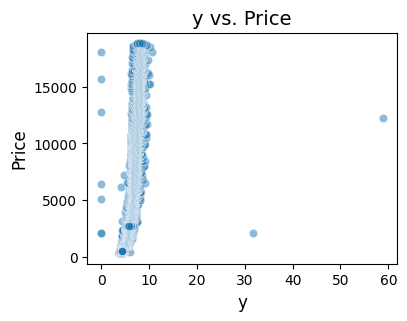

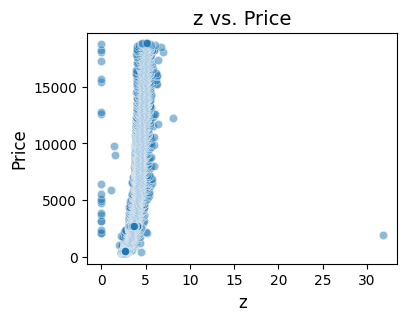

In [47]:
numerical_columns = df.select_dtypes(include='number').columns

# Loop through each numerical column
for column in numerical_columns:
    # Create scatter plot with price
    plt.figure(figsize=(4,3))  # Adjust the figure size if needed
    sns.scatterplot(data=df, x=column, y='price', alpha=0.5)
    plt.title(f'{column} vs. Price', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.show()


**Bivariate Inferences:**

- x,y and z are highly correlated with price.
- Carat is highly correlated with price.
- When categorical columns is considered with price, many outliers is seen.


In [10]:
#filtering the numerical and categorical datatype
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')

In [11]:
df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [12]:
#encoding the columns
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df_encoded = pd.DataFrame(encode.fit_transform(df_cat).toarray(), columns=encode.get_feature_names_out())

In [13]:
df_encoded

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
#scaling the columns
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_num = df_num.drop(columns='price')
df_scaled = min_max.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns= min_max.get_feature_names_out())
df_scaled

,carat,depth,table,x,y,z
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478
...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610


In [15]:
#merging the dataframes
df_new= pd.concat([df_encoded, df_scaled,df.price], axis=1)

In [16]:
df_new

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,price
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,326
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,326
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,327
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,334
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063,2757
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522,2757
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950,2757
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610,2757


In [17]:
df_new.isna().sum()

cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
dtype: int64

In [18]:
# defining y as label
y=df.price
df_new=pd.concat([df_scaled,df_encoded,y],axis = 1)

## Model Training: Random Forest 

- **Applying grid searchCV**

In [19]:
df_new=df_new.sample(500)

In [20]:
print('Best Model after grid cv, Random Forest Regreesor')
X = df_new.drop(columns = 'price')
y = df_new.price
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 400)
model_rf = rf.fit(X_train,y_train)
yhat_train = model_rf.predict(X_train)
#rf_r_square_train = model_rf.score(X_train,yhat_train)


yhat_test = model_rf.predict(X_test)
#rf_r_square_test = model_rf.score(X_test,yhat_test)

R_sq_train = model_rf.score(X_train,y_train)
R_sq_test = model_rf.score(X_test,y_test)
train_MSE = mean_squared_error(y_train,yhat_train)
test_MSE = mean_squared_error(y_test, yhat_test)
train_MAPE = mean_absolute_percentage_error(y_train,yhat_train)
test_MAPE = mean_absolute_percentage_error(y_test,yhat_test)

train = mean_absolute_percentage_error(y_train,yhat_train)
test = mean_absolute_percentage_error(y_test,yhat_test)
mape_percent_ls = np.mean(np.abs((train-test)/train))*100



print(f" R square for train model is {R_sq_train}")
print(f" Mse of train data is {train_MSE}")
print(f"Mse of test data is {test_MSE}")
print(f"MAPE of train data is {train_MAPE}")
print(f"MAPE of test data is {test_MAPE}")

Best Model after grid cv, Random Forest Regreesor
 R square for train model is 0.987074050781438
 Mse of train data is 230029.87569165
Mse of test data is 1133640.6109351998
MAPE of train data is 0.06472102505772569
MAPE of test data is 0.13393806050711754


## Pickling the Model

In [21]:
import pickle

# Save the trained model as a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)


# Conclusion:

- Random Forest Regressor performs best.
- Train MAPE: 6.47%
- Test MAPE: 13.39%
- Website URL: https://mlops-abop01w1bi.streamlit.app/

#### 